In [21]:
import numpy as np
from scipy.integrate import solve_ivp
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
# Parameters

Ainit = 1e-7
rtot = 1e5
kon = 1e5
koff = 1e-4
k = Ainit*kon
alpha = k/koff
Target_cell_number = 5e3
Atot = 1e16*Ainit/Target_cell_number
beta = Atot/rtot
v_int = 5
v_rec = 10
v_deg = 2
delta = 4

In [23]:
def model(t, z):

    dA1 = 2*alpha*beta*(1 - z[0] - z[2] - z[4] - 2*(z[1] + z[3])) - z[0] - delta*alpha*(1 - z[0] - z[2] - z[4] - 2*(z[1] + z[3]))*z[0] + 2*z[1] - v_int*(z[0]/(z[0] + z[1] + 1 - z[0] - z[2] - z[4] - 2*(z[1] + z[3])))*z[0] + v_rec*z[2]
    dA2 = delta*alpha*(1 - z[0] - z[2] - z[4] - 2*(z[1] + z[3]))*z[0] - 2*z[1] - v_int*(z[1]/(z[0] + z[1] + 1 - z[0] - z[2] - z[4] - 2*(z[1] + z[3])))*z[1] + v_rec*z[3]
    dA1i = v_int*(z[0]/(z[0] + z[1] + 1 - z[0] - z[2] - z[4] - 2*(z[1] + z[3])))*z[0] - (v_rec + v_deg)*z[2]
    dA2i = v_int*(z[1]/(z[0] + z[1] + 1 - z[0] - z[2] - z[4] - 2*(z[1] + z[3])))*z[1] - (v_rec + v_deg)*z[3]
    dri = v_deg*z[2] + 2*v_deg*z[3] - 1*v_rec*z[4] + v_int*(1 - z[0] - z[2] - z[4] - 2*(z[1] + z[3]))

    dz = [dA1, dA2, dA1i, dA2i, dri]

    return dz

In [24]:
z0 = [0, 0, 0, 0, 0]
t_end = 10
t = np.geomspace(1e-8, t_end, 5000)
tspan = [1e-8, t_end]

z = solve_ivp(model, tspan, z0, method='LSODA', t_eval=t)

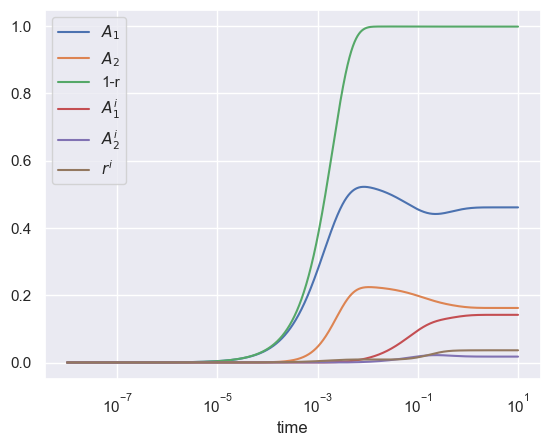

In [25]:
sns.set_theme()

A1 = z.y[0]
A2 = z.y[1]
A1i = z.y[2]
A2i = z.y[3]
ri = z.y[4]

r1 = 1 - (1 - z.y[0] - z.y[2] - z.y[4] - 2*(z.y[1]) - 2*(z.y[3]))

plt.plot(t, A1, label = r'$A_1$')
plt.plot(t, A2, label = r'$A_2$')
plt.plot(t, r1, label = '1-r')
plt.plot(t, A1i, label = r'$A_1^i$')
plt.plot(t, A2i, label = r'$A_2^i$')
plt.plot(t, ri, label = r'$r^i$')
plt.xlabel('time')
plt.xscale('log')
plt.legend(loc='best')
plt.show()